In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.feature_selection import mutual_info_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [36]:
# Load dataset
df = pd.read_csv('new_dataset.csv')
df.head()

,career_path,expertise_level,working_frequency,tech_news_frequency,willingness_to_learn,interest_visual_elements,interest_user_behavior,math_background,interest_working_with_data,interest_data_analysis,interest_data_insights,interest_ml_algorithms,interest_server_side,interest_innovation,interest_mobile_apps,concern_digital_security,interest_security_concepts,interest_design_thinking,interest_web
0,Frontend Developer,Intermediate,Weekly,Weekly,Yes,Yes,yes,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes
1,Frontend Developer,Beginner,Weekly,Weekly,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes
2,Backend Developer,Expert,Daily,Weekly,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes
3,UI/UX Designer,Intermediate,Weekly,Daily,No,Yes,yes,No,No,No,No,No,No,No,No,No,No,No,No
4,Data Scientist,Beginner,Daily,Daily,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,Yes,No


In [37]:
# Encoding categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [38]:
df.head()

,career_path,expertise_level,working_frequency,tech_news_frequency,willingness_to_learn,interest_visual_elements,interest_user_behavior,math_background,interest_working_with_data,interest_data_analysis,interest_data_insights,interest_ml_algorithms,interest_server_side,interest_innovation,interest_mobile_apps,concern_digital_security,interest_security_concepts,interest_design_thinking,interest_web
0,3,2,4,4,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1
1,3,0,4,4,1,1,0,1,1,0,0,1,1,1,0,1,0,1,1
2,0,1,0,4,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1
3,6,2,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0


In [39]:
# Split features and target variable
X = df.drop(columns=['career_path'])
y = df['career_path']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

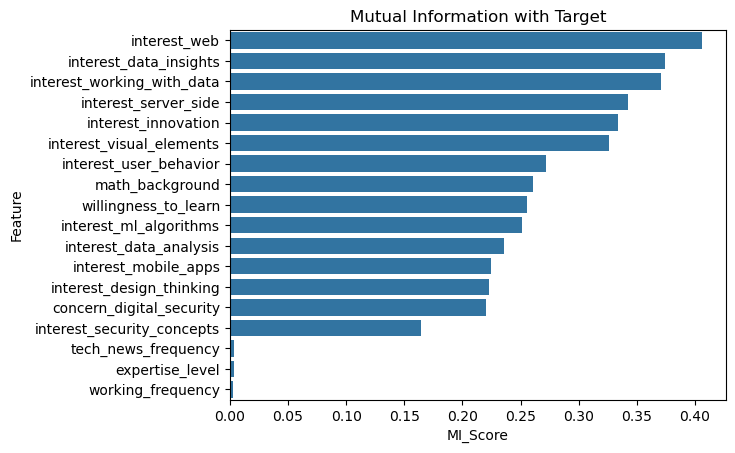

In [40]:
mi_scores = mutual_info_classif(X, y, discrete_features=True)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# Mutual Information plot
sns.barplot(data=mi_df, x='MI_Score', y='Feature')
plt.title('Mutual Information with Target')
plt.show()

In [41]:
# Print value counts of the target variable
print(df['career_path'].value_counts())

career_path
0    1267
6    1222
3    1208
5    1196
1    1185
2    1178
4    1160
Name: count, dtype: int64


In [42]:
# Compute sample weights (XGBoost)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = {}
trained_models = {}


Training Decision Tree...

Decision Tree Model Evaluation:
Accuracy: 0.8539
              precision    recall  f1-score   support

           0      0.822     0.770     0.795       270
           1      0.866     0.892     0.878       231
           2      0.859     0.839     0.849       218
           3      0.888     0.852     0.870       243
           4      0.857     0.888     0.872       242
           5      0.831     0.854     0.842       247
           6      0.860     0.893     0.876       233

    accuracy                          0.854      1684
   macro avg      0.855     0.856     0.855      1684
weighted avg      0.854     0.854     0.854      1684



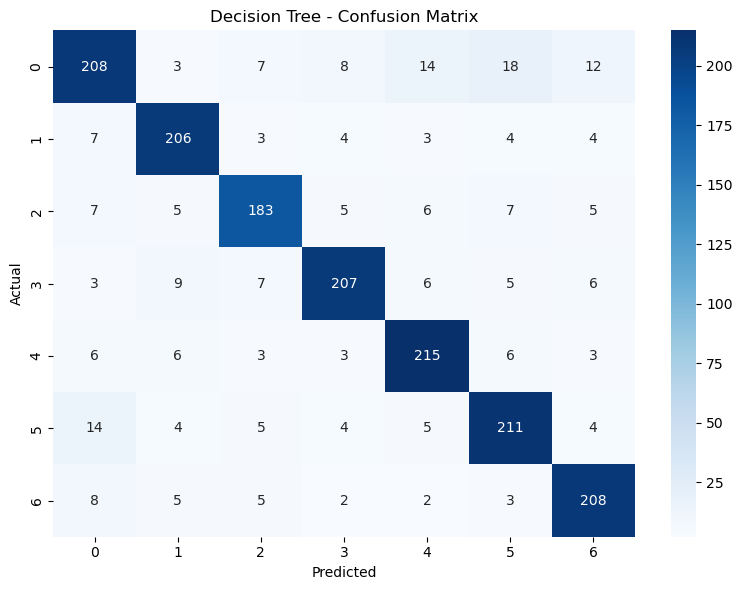


Training Random Forest...

Random Forest Model Evaluation:
Accuracy: 0.8616
              precision    recall  f1-score   support

           0      0.802     0.767     0.784       270
           1      0.877     0.892     0.884       231
           2      0.833     0.849     0.841       218
           3      0.894     0.868     0.881       243
           4      0.911     0.893     0.902       242
           5      0.839     0.887     0.862       247
           6      0.881     0.888     0.885       233

    accuracy                          0.862      1684
   macro avg      0.863     0.863     0.863      1684
weighted avg      0.862     0.862     0.861      1684



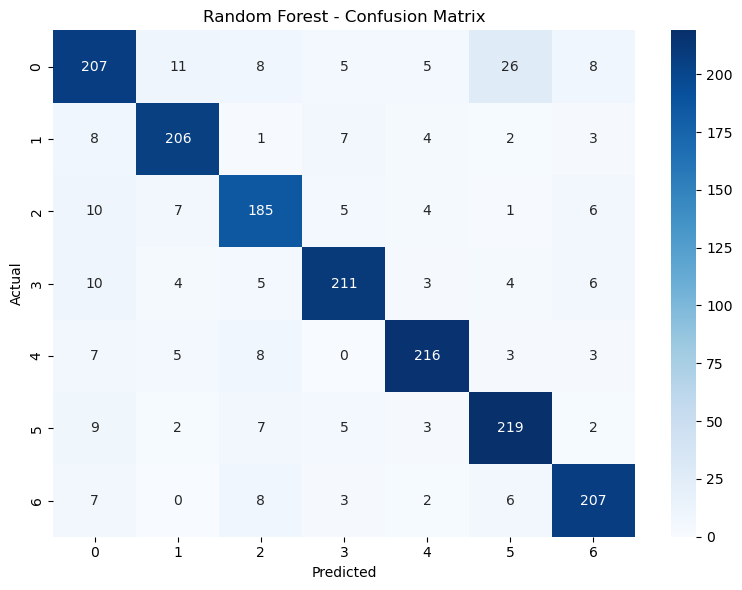


Training XGBoost...


C:\Users\hasit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:27:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Model Evaluation:
Accuracy: 0.8628
              precision    recall  f1-score   support

           0      0.815     0.781     0.798       270
           1      0.887     0.883     0.885       231
           2      0.864     0.844     0.854       218
           3      0.871     0.889     0.880       243
           4      0.896     0.888     0.892       242
           5      0.858     0.879     0.868       247
           6      0.855     0.884     0.869       233

    accuracy                          0.863      1684
   macro avg      0.864     0.864     0.864      1684
weighted avg      0.863     0.863     0.863      1684



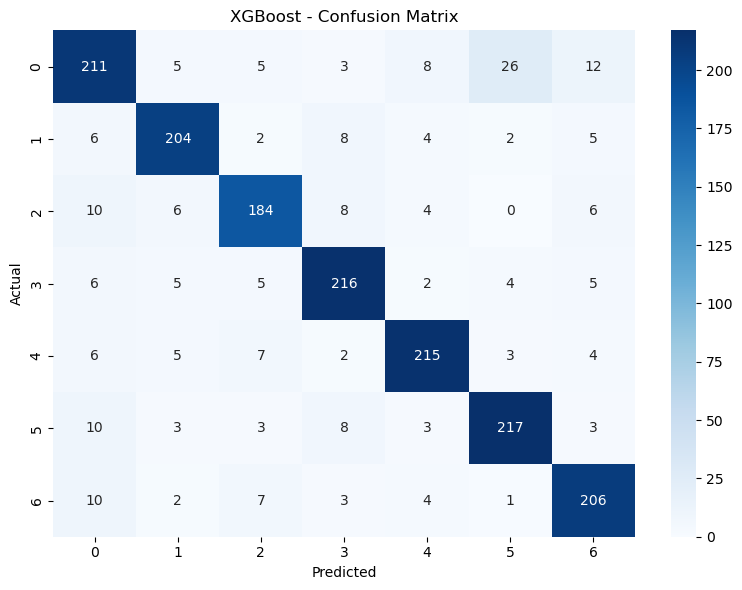

In [43]:
# Train and evaluate models
for name, model in models.items():
    print(f'\nTraining {name}...')
    
    if name == 'XGBoost':
        model.fit(X_train, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train, y_train)
    
    trained_models[name] = model

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f'\n{name} Model Evaluation:')
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred, digits=3))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [44]:
# Select and save best model
best_model_name = max(results, key=results.get)
best_model = trained_models[best_model_name]

print(f'\nBest Performing Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}')


Best Performing Model: XGBoost with Accuracy: 0.8628


In [45]:
# Sample predictions
print("\nSample Predictions from the Best Model:")
sample_indices = X_test.sample(5, random_state=42).index
sample_data = X_test.loc[sample_indices]
sample_true = y_test.loc[sample_indices]
sample_preds = best_model.predict(sample_data)

# Decode predictions and true labels
career_le = label_encoders['career_path']
decoded_true = career_le.inverse_transform(sample_true)
decoded_pred = career_le.inverse_transform(sample_preds)

for i, (true_label, pred_label) in enumerate(zip(decoded_true, decoded_pred)):
    print(f"Sample {i+1}: True = {true_label}, Predicted = {pred_label}")


Sample Predictions from the Best Model:
Sample 1: True = Frontend Developer, Predicted = Frontend Developer
Sample 2: True = UI/UX Designer, Predicted = UI/UX Designer
Sample 3: True = Mobile App Developer, Predicted = Mobile App Developer
Sample 4: True = Mobile App Developer, Predicted = Mobile App Developer
Sample 5: True = ML Engineer, Predicted = ML Engineer


In [46]:
# Save the best model
model_filename = f"{best_model_name.lower().replace(' ', '_')}_model.pkl"
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"\nBest model saved as '{model_filename}'")


Best model saved as 'xgboost_model.pkl'
